In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.drop('CUST_ID', axis=1, inplace=True)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df = df.dropna(axis = 0, subset = ['CREDIT_LIMIT'])

In [59]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [25]:
df.shape

(8949, 17)

In [269]:
class PCA ():

    def __init__(self,n_components = 0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):

        self.mean = np.mean(X, axis=0) # mean for each feature
        self.std = np.std(X, axis=0) # standard deviation for each feature
        
        # fill
        X_new =( X - self.mean )/ self.std
        
        # Covariance_matrix
        covariance_mat = np.cov(X_new.T)
        
        eign_values, eign_vectors = np.linalg.eig(covariance_mat)
        
        # Sort eign vectors according to maximum eign values
        sorted_indices = np.argsort(eign_values)[::-1]
        
        eign_vectors = eign_vectors[sorted_indices]
        
        if self.n_components == 'var':
            self.components = eign_vectors[:self.n_components] #matrix (n,)
        else:
            self.components_ratio = eign_values[sorted_indices] / np.sum(eign_values)
            self.comulative_sum = np.cumsum(self.components_ratio)

            self.components = eign_vectors[:,self.comulative_sum<=self.n_components]
        

    def transform(self,Z):
        # fill
        Z_new = Z-self.mean / self.std
        Z_new = Z_new @ self.components
        return Z_new

    #optional 
    def plot_explained_variance(self):
        plt.figure(figsize=(10,5))
        x = np.arange(1,len(self.components)+1)
        y = self.comulative_sum[:len(self.components)]

        plt.plot(x, y, color='blue')
        x_line = x[np.append(np.abs(self.comulative_sum[1:] - self.comulative_sum[:-1]<0.03), False)][0]
        plt.vlines(x_line, 0,1, color='red', linestyles='dotted')
        plt.show()

In [270]:
pca_section = PCA(n_components=0.95)
X_transofmed = pca_section.fit(df.values)

In [271]:
print(pca_section.components.shape)
print("expected shape: (17,11)")

(17, 11)
expected shape: (17,11)


In [272]:
pca_section.transform(df.values).shape

(8949, 11)

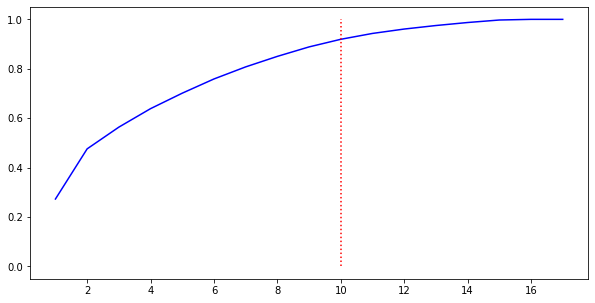

In [273]:
pca_section.plot_explained_variance()

In [65]:
pca_section.transform(df.values)

array([[ -329.31438151,    15.41222228,    52.37613378, ...,
         -214.86015774,   131.1333442 ,   253.46779906],
       [-3801.35675599,  1020.94331095,   507.21738659, ...,
          288.38689305,   996.17344605,  4476.58207447],
       [-2267.92237288,   152.23435735,   425.02084767, ...,
        -1045.87710951,   507.08161409,  3091.95729221],
       ...,
       [ -301.9328042 ,    15.30251948,    48.74122595, ...,
         -204.07763615,   136.67029688,   184.85107433],
       [ -146.76891395,    14.12181875,    15.71316718, ...,
         -103.33439287,    87.5241675 ,   156.06614819],
       [ -350.36310615,    37.75185865,    31.9138856 , ...,
           11.2471802 ,  -539.20462064,   454.7395538 ]])

In [154]:
pca_section.components_ratio

array([2.72877773e-01, 2.03026657e-01, 8.79099403e-02, 7.48101958e-02,
       6.26317700e-02, 5.75034478e-02, 4.88713042e-02, 4.25652864e-02,
       3.83053094e-02, 3.08004551e-02, 2.37202110e-02, 1.77371165e-02,
       1.42655011e-02, 1.21735715e-02, 1.01302079e-02, 2.67056792e-03,
       6.85237739e-07])

## Using Sklearn

In [156]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(df.values)
pca.components_.shape

(5, 17)

In [159]:
pca.components_

array([[ 2.91509229e-01,  8.36297094e-06,  2.92690500e-01,
         2.10843776e-01,  8.18411049e-02,  2.16278492e-01,
         1.29523373e-05,  2.27434898e-05,  8.44344589e-06,
         1.02153115e-05,  4.04598375e-04,  2.34094982e-03,
         6.90130784e-01,  4.87416098e-01,  1.32531475e-01,
         2.30711426e-06,  3.92081068e-05],
       [-3.00711143e-01, -4.26160812e-06,  5.00851975e-01,
         3.80386869e-01,  1.20505135e-01, -2.04428780e-01,
         3.71000260e-05,  2.84337818e-05,  3.02294083e-05,
        -1.93698934e-05, -5.03760746e-04,  3.51703332e-03,
        -4.47295533e-01,  4.70260989e-01, -1.91002631e-01,
         2.57025292e-05,  3.15132085e-06],
       [ 2.75015515e-01,  1.05214322e-05, -9.67980298e-02,
        -7.75177005e-02, -1.93083554e-02,  4.03126006e-01,
        -3.12321152e-05, -2.84233137e-05, -1.75768970e-05,
         2.88098212e-05,  1.00178726e-03, -9.82338023e-04,
        -5.06833432e-01,  2.96984672e-01,  6.33263159e-01,
        -2.77280836e-05, -2.7